In [404]:
# Data derived from
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [405]:
# Loading dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [406]:
# The details of the features are hidden by the bank, likely to preserve the user's privacy
# Now we check the 
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [407]:
# There are no null values in the dataset
# Time seems an irrelevant feature in this dataset, so we drop it
df = df.drop('Time', axis = 1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995
V10,284807.0,2.239053e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136


In [408]:
# The target class has a very low mean when it should be close to 0.5
1.727486e-03 * df.shape[0]

492.00010520200004

In [409]:
# Only 492 values are fradulent
492 / 284807 * 100

0.1727485630620034

In [410]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [411]:
# This shows that only 0.17% of the target value are fraud cases
# ML algorithms work best when target values are roughly the same
# To solve this we use oversampling using ADASYN, which adds a little variance to the points created by SMOTE
from sklearn.model_selection import train_test_split
(xo_train,xo_test, yo_train,yo_test) = train_test_split(X,Y,test_size = 0.3, random_state = 0)
# Scaling features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xo_train = sc.fit_transform(xo_train)
xo_test = sc.transform(xo_test)

In [412]:
from imblearn.over_sampling import ADASYN
print('Original data sha,', xo_train.shape)
ada = ADASYN()
X_r, Y_r = ada.fit_resample(xo_train,yo_train)
print('Resampled data shape,', X_r.shape)

Original data sha, (199364, 29)
Resampled data shape, (398002, 29)


In [413]:
# Total fraud cases in the oversampled class and its percentage
print(np.sum(Y_r))
np.sum(Y_r)/len(Y_r)

198983


0.4999547740966126

In [414]:
# The percentage of fradulent and non-fradulent cases in the dataset is now almost equal
(x_train,x_test, y_train,y_test) = train_test_split(X_r,Y_r,test_size = 0.05, random_state = 0)

In [415]:
# Using random forest classifier to train the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [512]:
# Our target metric to maximize is recall because false negatives are much more dangerous than false positives in our case
def cf_mat(y_true,y_pred,lb):
    y_pred = (y_pred >= 0.5) * 1
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
    import seaborn as snf
    labels = ['not fraud','fraud']
    plt.figure(figsize=(8,8))
    snf.heatmap(confusion_matrix(y_true,y_pred), square = True, annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
    plt.ylabel("True value")
    plt.xlabel("Predicted value")
    plt.title(lb)
    plt.show()
    print("Accuracy of the model on",lb,"is: ","{:.2f}".format(accuracy_score(y_true, y_pred) * 100),'%')
    print("Recall of the model on",lb,"is: ","{:.2f}".format(recall_score(y_true, y_pred) * 100),'%')

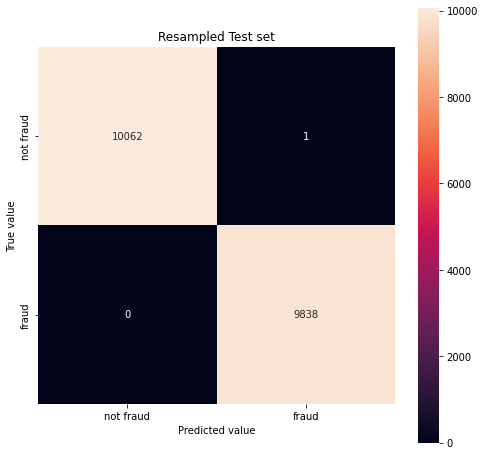

Accuracy of the model on Resampled Test set is:  99.99 %
Recall of the model on Resampled Test set is:  100.00 %


In [513]:
y_p_test = rf.predict((x_test))
cf_mat(y_test,y_p_test,"Resampled Test set")

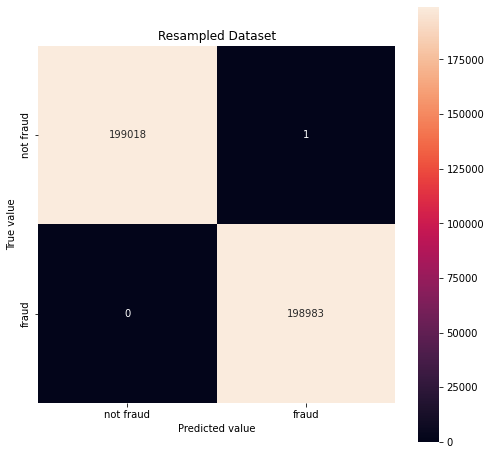

Accuracy of the model on Resampled Dataset is:  100.00 %
Recall of the model on Resampled Dataset is:  100.00 %


In [514]:
y_r_p = rf.predict((X_r))
cf_mat(Y_r,y_r_p,"Resampled Dataset")

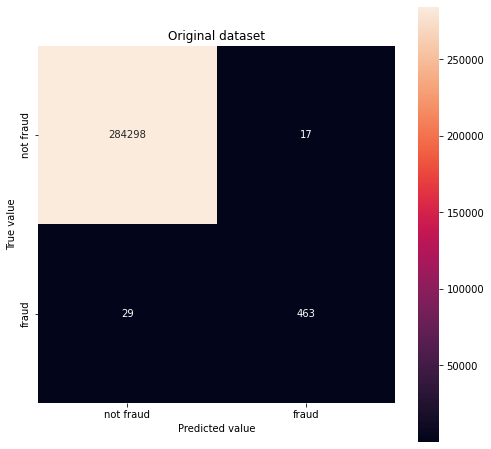

Accuracy of the model on Original dataset is:  99.98 %
Recall of the model on Original dataset is:  94.11 %


In [515]:
y_da = rf.predict(sc.transform(X))
cf_mat(Y,y_da,"Original dataset")

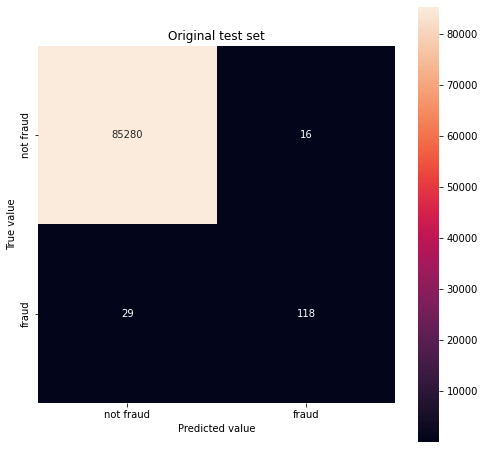

Accuracy of the model on Original test set is:  99.95 %
Recall of the model on Original test set is:  80.27 %


In [516]:
y_p_xo = rf.predict(xo_test)
cf_mat(yo_test,y_p_xo,"Original test set")

In [593]:
import tensorflow as tf
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(29,), activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(75, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
 
# Compiling the model
model.compile(optimizer=optimizers.Adam(0.001),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.binary_accuracy])
 
# fitting the model
model.fit(x_train, y_train, epochs=5, batch_size=4096)

Epoch 1/5
93/93 [==============================] - 2s 13ms/step - loss: 0.4086 - binary_accuracy: 0.7975
Epoch 2/5
93/93 [==============================] - 1s 13ms/step - loss: 0.1249 - binary_accuracy: 0.9615
Epoch 3/5
93/93 [==============================] - 1s 13ms/step - loss: 0.0509 - binary_accuracy: 0.9877
Epoch 4/5
93/93 [==============================] - 1s 13ms/step - loss: 0.0274 - binary_accuracy: 0.9942
Epoch 5/5
93/93 [==============================] - 1s 13ms/step - loss: 0.0175 - binary_accuracy: 0.9967


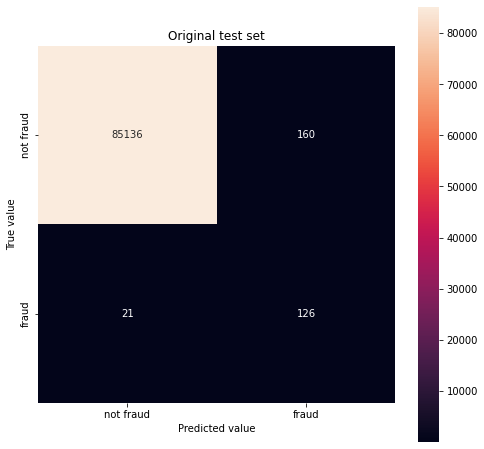

Accuracy of the model on Original test set is:  99.79 %
Recall of the model on Original test set is:  85.71 %


In [594]:
y_p_xo = model.predict(xo_test)
cf_mat(yo_test,y_p_xo,"Original test set")

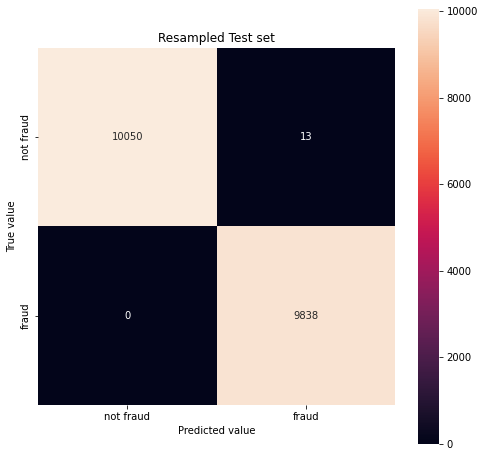

Accuracy of the model on Resampled Test set is:  99.93 %
Recall of the model on Resampled Test set is:  100.00 %


In [595]:
y_p_test = model.predict((x_test))
cf_mat(y_test,y_p_test,"Resampled Test set")

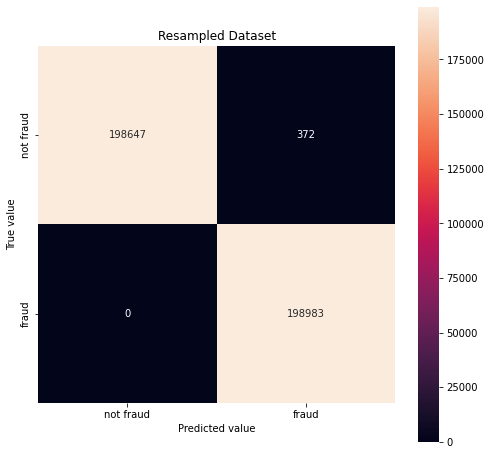

Accuracy of the model on Resampled Dataset is:  99.91 %
Recall of the model on Resampled Dataset is:  100.00 %


In [596]:
y_r_p = model.predict((X_r))
cf_mat(Y_r,y_r_p,"Resampled Dataset")

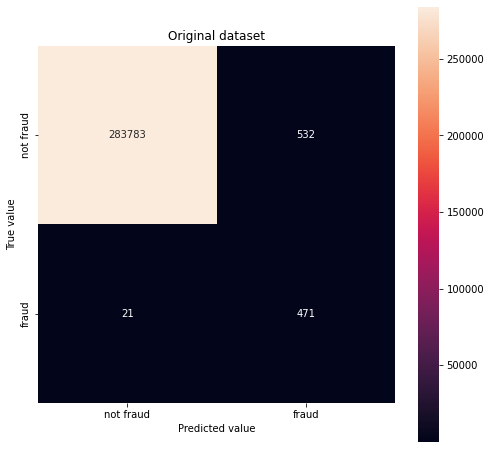

Accuracy of the model on Original dataset is:  99.81 %
Recall of the model on Original dataset is:  95.73 %


In [597]:
y_da = model.predict(sc.transform(X))
cf_mat(Y,y_da,"Original dataset")

In [ ]:
# Overall we can select either random forest or deep learning model based on our needs
# On resampled test set, random forest works best
# On the test set from the original dataset, deep learning model can detect more fradulent cases but creates much more false positives